# Advanced Regression - Ridge and Lasso
## House Price Prediction - Assignment

#### Problem Statement:

A US-based housing company named `Surprise Housing` has decided to enter the Australian market.The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. We are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

   - Which variables are significant in predicting the price of a house.
   - How well those variables describe the price of a house.
   - determine the optimal value of lambda for ridge and lasso regression.
   

#### Goals:

   - Build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.
   - Determine the optimal value of lambda for ridge and lasso regression.
   - This model will then be used by the management to understand how exactly the prices vary with the variables.
   - They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. 
   - The model will be a good way for management to understand the pricing dynamics of a new market.

The solution is divided into the following sections: 
- Data Understanding and Handling Missing values
- Data Exploration and Features Encoding 
- Splitting the Data into Training and Testing Sets and Scaling
- Lasso , Ridge Model Building and Evaluation
- Conclusion

### 1. Data Understanding and Handling Missing values

In [1]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import mean_squared_error


In [2]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [3]:
# Reading the dataset
houseData = pd.read_csv("train.csv")

In [4]:
# Let's take a look at the first few rows
houseData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
houseData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
#find the missing values count in each column

missingData = pd.DataFrame(data=houseData.isnull().sum().sort_values(ascending=False), columns=['MissingCount'])
missingData['Percent'] = missingData.MissingCount.apply(lambda x : '{:.2f}'.format(float(x)/houseData.shape[0] * 100))
missingData = missingData[missingData.MissingCount > 0]

In [7]:
missingData

,MissingCount,Percent
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageCond,81,5.55
GarageType,81,5.55
GarageYrBlt,81,5.55
GarageFinish,81,5.55


***If we observe the data the columns `PoolQC,MiscFeature,Alley and Fence` has more missing values greter then 80%, we can drop these columns.***

In [8]:
houseData.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis=1, inplace=True)

In [9]:
houseData.FireplaceQu.unique() 

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

 In `FireplaceQu` column we have only 6 uniques values which are *Ex - Exceptional Masonry Fireplace, Gd - Good Masonry Fireplace in main level, TA- Prefabricated Fireplace in main living area or Masonry Fireplace in basement, Fa - Prefabricated Fireplace in basement, Po - Poor Ben Franklin Stove and NA - No Fireplace.*  **We can replace nan (missing values) with NA.** 

In [10]:
houseData['FireplaceQu'].fillna('NA', inplace=True)

In [11]:
houseData.LotFrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

We can replace missing values with mean in `LotFrontage` column

In [12]:
houseData['LotFrontage'].fillna('70', inplace=True)

Categorical columns `GarageCond,GarageType,GarageFinish,GarageQual,BsmtExposure,BsmtFinType2,BsmtCond,BsmtQual` have type NA, we will replace missing values with NA.

In [13]:

for col in ('GarageCond','GarageType','GarageFinish','GarageQual','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtCond','BsmtQual'):
    houseData[col].fillna('NA', inplace=True)

The column `MasVnrType` has None as a type, we will replace null values with None

In [14]:
houseData['MasVnrType'].fillna('None', inplace=True)

Missing values in numerical columns `GarageYrBlt,BsmtFinType1 and MasVnrArea` we will replace with 0.

In [15]:
houseData['GarageYrBlt'].fillna(0, inplace=True)
houseData['MasVnrArea'].fillna(0, inplace=True)

We have only one missing value in `Electrical` column we will replace it with mode.

In [16]:
houseData.Electrical.describe()

count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object

In [17]:
houseData['Electrical'].fillna('SBrkr', inplace=True)

### 2. Data Exploration and Features Encoding

***Removing outliers of numerical columns***

In [18]:
houseData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [19]:
houseData.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1868.739726,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,453.697295,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1958.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1977.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
90%,1314.100000,120.000000,14381.700000,8.000000,7.000000,2006.000000,2006.000000,335.000000,1065.500000,117.200000,1232.000000,1602.200000,1680.000000,954.200000,0.000000,2158.300000,1.000000,0.000000,2.000000,1.000000,4.000000,1.000000,9.000000,1.000000,2006.000000,3.000000,757.100000,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2010.000000,278000.000000
95%,1387.050000,160.000000,17401.150000,8.000000,8.000000,2007.000000,2007.000000,456.000000,1274.000000,396.200000,1468.000000,1753.000000,1831.250000,1141.050000,0.000000,2466.100000,1.000000,1.000000,2.000000,1.000000,4.000000,1.000000,10.000000,2.000000,2007.000000,3.000000,850.100000,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,11.000000,2010.000000,326100.000000
99%,1445.410000,190.000000,37567.640000,10.000000,9.000000,2009.000000,2009.000000,791.280000,1572.410000,830.38

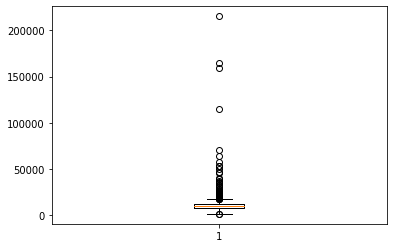

In [20]:
#Drqwing box plot and removing the outliers
plt.boxplot(houseData['LotArea'])
plt.show()
Q1 = houseData['LotArea'].quantile(0.1)
Q3 = houseData['LotArea'].quantile(0.9)
IQR = Q3 - Q1
houseData = houseData[(houseData['LotArea'] >= Q1 - 1.5*IQR) & (houseData['LotArea'] <= Q3 + 1.5*IQR)]



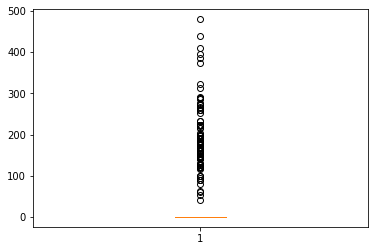

In [21]:
plt.boxplot(houseData['ScreenPorch'])
plt.show()
Q1 = houseData['ScreenPorch'].quantile(0.1)
Q3 = houseData['ScreenPorch'].quantile(0.9)
IQR = Q3 - Q1
houseData = houseData[(houseData['ScreenPorch'] >= Q1 - 1.5*IQR) & (houseData['ScreenPorch'] <= Q3 + 1.5*IQR)]

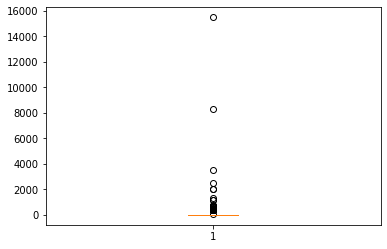

In [22]:
plt.boxplot(houseData['MiscVal'])
plt.show()
Q1 = houseData['MiscVal'].quantile(0.1)
Q3 = houseData['MiscVal'].quantile(0.9)
IQR = Q3 - Q1
houseData = houseData[(houseData['MiscVal'] >= Q1 - 1.5*IQR) & (houseData['MiscVal'] <= Q3 + 1.5*IQR)]

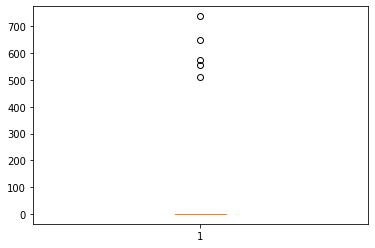

In [23]:
plt.boxplot(houseData['PoolArea'])
plt.show()
Q1 = houseData['PoolArea'].quantile(0.1)
Q3 = houseData['PoolArea'].quantile(0.9)
IQR = Q3 - Q1
houseData = houseData[(houseData['PoolArea'] >= Q1 - 1.5*IQR) & (houseData['PoolArea'] <= Q3 + 1.5*IQR)]

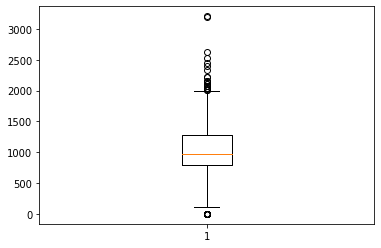

In [24]:
plt.boxplot(houseData['TotalBsmtSF'])
plt.show()
Q1 = houseData['TotalBsmtSF'].quantile(0.1)
Q3 = houseData['TotalBsmtSF'].quantile(0.9)
IQR = Q3 - Q1
houseData = houseData[(houseData['TotalBsmtSF'] >= Q1 - 1.5*IQR) & (houseData['TotalBsmtSF'] <= Q3 + 1.5*IQR)]

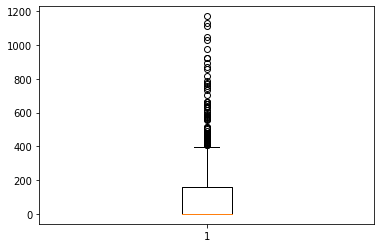

In [25]:
plt.boxplot(houseData['MasVnrArea'])
plt.show()
Q1 = houseData['MasVnrArea'].quantile(0.1)
Q3 = houseData['MasVnrArea'].quantile(0.9)
IQR = Q3 - Q1
houseData = houseData[(houseData['MasVnrArea'] >= Q1 - 1.5*IQR) & (houseData['MasVnrArea'] <= Q3 + 1.5*IQR)]

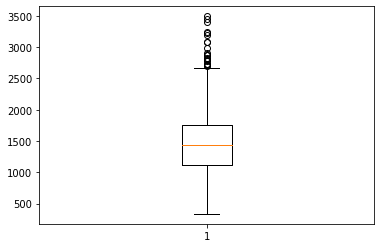

In [26]:
plt.boxplot(houseData['GrLivArea'])
plt.show()
Q1 = houseData['GrLivArea'].quantile(0.1)
Q3 = houseData['GrLivArea'].quantile(0.9)
IQR = Q3 - Q1
houseData = houseData[(houseData['GrLivArea'] >= Q1 - 1.5*IQR) & (houseData['GrLivArea'] <= Q3 + 1.5*IQR)]

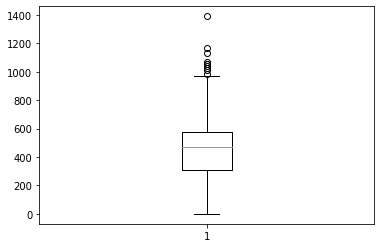

In [27]:
plt.boxplot(houseData['GarageArea'])
plt.show()
Q1 = houseData['GarageArea'].quantile(0.1)
Q3 = houseData['GarageArea'].quantile(0.9)
IQR = Q3 - Q1
houseData = houseData[(houseData['GarageArea'] >= Q1 - 1.5*IQR) & (houseData['GarageArea'] <= Q3 + 1.5*IQR)]

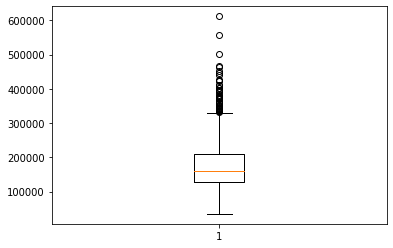

In [28]:
plt.boxplot(houseData['SalePrice'])
plt.show()
Q1 = houseData['SalePrice'].quantile(0.1)
Q3 = houseData['SalePrice'].quantile(0.9)
IQR = Q3 - Q1
houseData = houseData[(houseData['SalePrice'] >= Q1 - 1.5*IQR) & (houseData['SalePrice'] <= Q3 + 1.5*IQR)]

***After removing outliers there are no values in the `PoolArea,ScreenPorch and MiscVal` columns, So we will drop these columns.***

In [29]:
houseData.drop(['PoolArea', 'ScreenPorch', 'MiscVal'], axis = 1, inplace = True)

In [30]:
round(100*(len(houseData)/1460),2)

86.16

***After removing the null values and outliers we left with 86% data***


In [31]:
numeric_columns = houseData.select_dtypes(include=['float64', 'int64'])

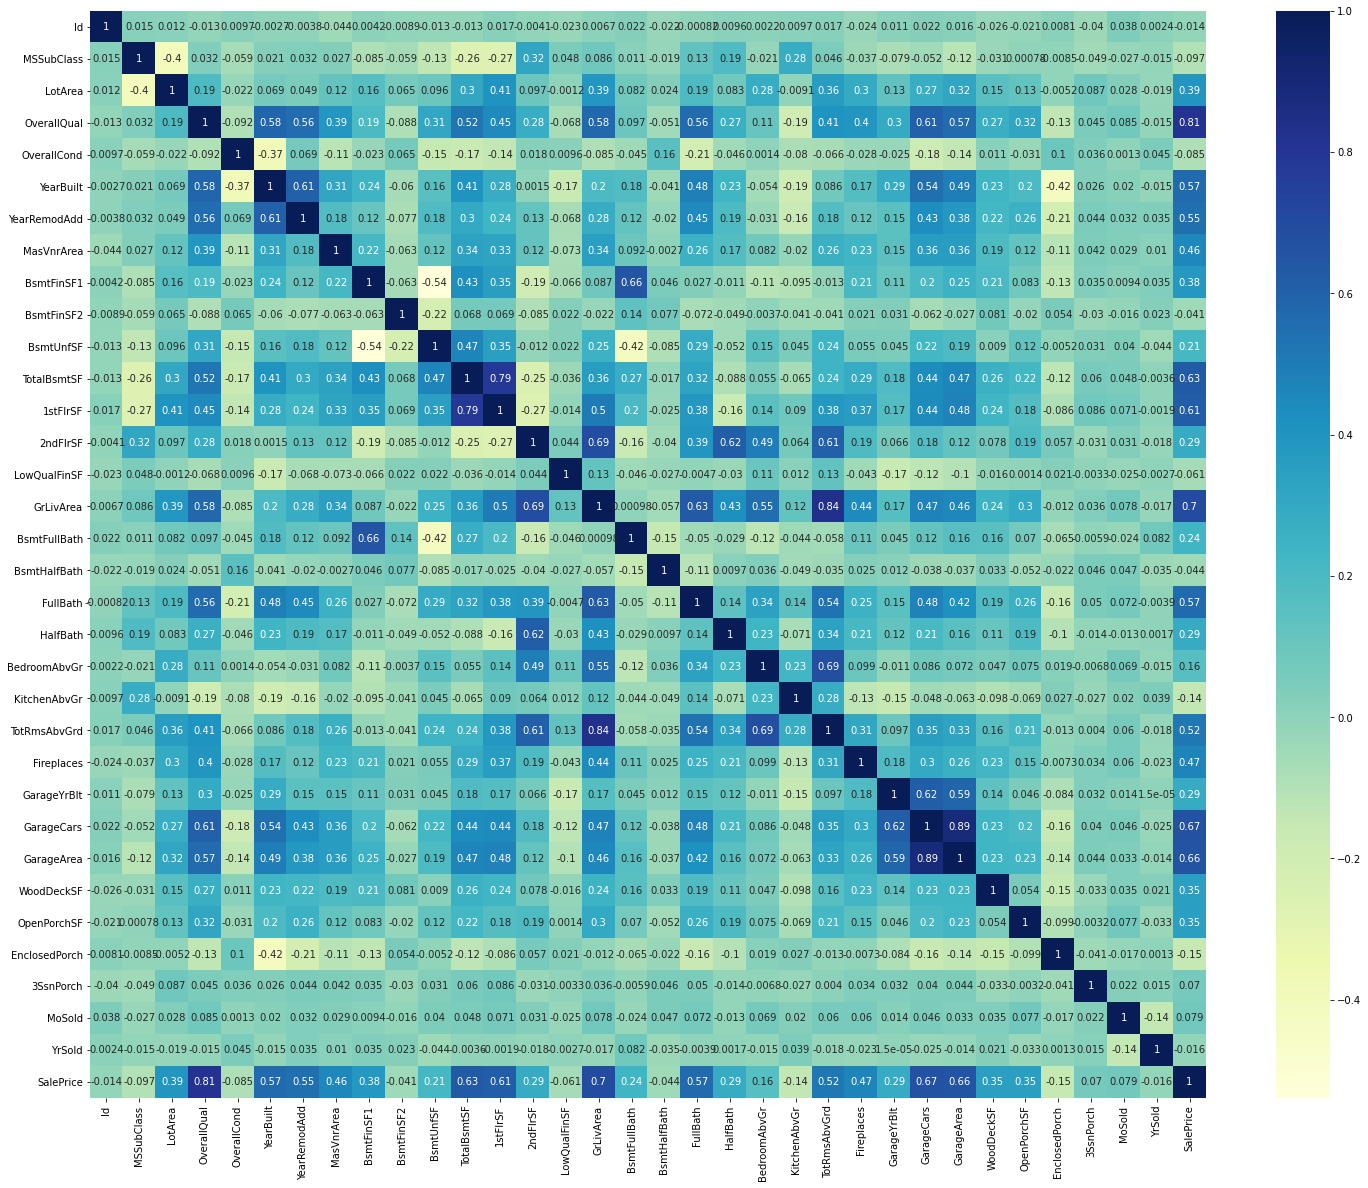

In [32]:
plt.figure(figsize = (25, 20))
sns.heatmap(numeric_columns.corr(), annot = True, cmap="YlGnBu")
plt.show()

<Figure size 720x360 with 0 Axes>

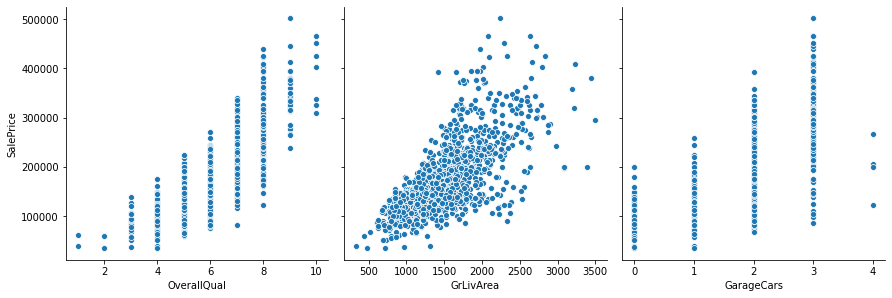

In [33]:
plt.figure(figsize=(10,5))
sns.pairplot(houseData, x_vars=['OverallQual','GrLivArea','GarageCars'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
plt.show()

***The target variable `SalePrice` has high correlation with `OverAllQual,GrLivArea,GrageCars and GarageArea` columns***

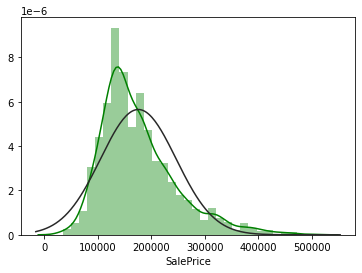

In [34]:
#Target variable distribution
sns.distplot(houseData['SalePrice'], fit = norm, color='green')

***Target variable is skewed to the right we have to make it normally distributed by Log-Transformation***

In [35]:
houseData['SalePrice'] = np.log1p(houseData['SalePrice'])

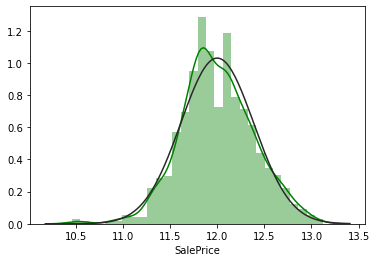

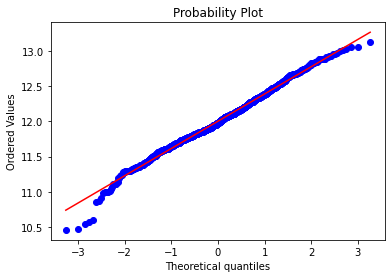

In [36]:
sns.distplot(houseData['SalePrice'], fit = norm, color = 'green')
fig = plt.figure()
res = stats.probplot(houseData['SalePrice'],plot = plt)


In [37]:
#Creating house age derived feature column
def houseAge(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return row['YrSold'] - row['YearBuilt']
    else:
        return row['YrSold'] - row['YearRemodAdd']
    
houseData['HouseAge']=houseData.apply(houseAge, axis=1)

In [38]:
#Creating new derived feature called Remodelled Type
def remodelType(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return 0
    elif(row['YearBuilt'] < row['YearRemodAdd']):
        return 1
    else:
        return 2
    
houseData['RemodelType']=houseData.apply(remodelType, axis=1)

In [39]:
#Creating new derived feature called Garage Type
def garageType(row):
    if row == 0:
        return 'Old'
    elif row >= 1900 and row < 2000:        
        return 'Old'
    else:   
        return 'New'
    
houseData['GarageType']=houseData['GarageYrBlt'].apply(garageType)
    

In [40]:
houseData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,MoSold,YrSold,SaleType,SaleCondition,SalePrice,HouseAge,RemodelType
0,1,60,RL,65,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NA,New,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,2,2008,WD,Normal,12.247699,5,0
1,2,20,RL,80,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Old,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,5,2007,WD,Normal,12.109016,31,0
2,3,60,RL,68,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,New,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,9,2008,WD,Normal,12.317171,6,1
3,4,70,RL,60,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Old,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,2,2006,WD,Abnorml,11.849405,36,1
4,5,60,RL,84,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,New,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,12,2008,WD,Normal,12.429220,8,0


In [41]:
# We have created new features from YearBuilt, YearRemodAdd, YrSold and GarageYrBlt columns we will drop these columns

houseData.drop(['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt'], axis = 1, inplace = True)

In [42]:
# Transforming categorical columns numerical to string
houseData['MoSold'] = houseData['MoSold'].astype(str)
houseData['LotFrontage'] = houseData['LotFrontage'].astype(int)

In [43]:
#droping unnessesary columns
houseData.drop(['Id','LandContour','Electrical','Heating','BsmtFinType2','Condition2','RoofMatl','Condition1','SaleType','MoSold','GarageCond'], axis = 1, inplace = True)

***Now we are going to encode ordinal categorical data***

In [44]:
houseData['LotShape'] = houseData['LotShape'].map({'Reg': 4, 'IR1': 3, 'IR2': 2, 'IR3': 1,'None':0})
houseData['ExterQual'] = houseData['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1,'None':0})
houseData['GarageFinish'] = houseData['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'NA': 0,'None':0 })
houseData['KitchenQual'] = houseData['KitchenQual'].map({'Ex': 4, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1,'None':0})
houseData['ExterCond'] = houseData['ExterCond'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1,'None':0})
houseData['BsmtExposure'] = houseData['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'NA': 0,'None':0})
houseData['HeatingQC'] = houseData['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1,'Noone':0})
houseData['BldgType'] = houseData['BldgType'].map({'Twnhs': 5, 'TwnhsE': 4, 'Duplex': 3, '2fmCon': 2, '1Fam': 1,'None':0})
houseData['BsmtQual'] = houseData['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0,'None':0})
houseData['LotConfig'] = houseData['LotConfig'].map({'Inside': 5, 'Corner': 4, 'CulDSac': 3, 'FR2': 2, 'FR3': 1,'None':0})
houseData['BsmtCond'] = houseData['BsmtCond'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA':0,'None':0})
houseData['GarageQual'] = houseData['GarageQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA':0,'None':0})
houseData['FireplaceQu'] = houseData['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0,'None':0})
houseData['BsmtFinType1'] = houseData['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1,'NA': 0,'None':0})
houseData['Functional'] = houseData['Functional'].map({'Typ': 8, 'Min1': 7, 'Min2': 6, 'Mod': 5, 'Maj1': 4, 'Maj2': 3,'Sev': 2,'Sal':1,'None':0})
houseData['HouseStyle'] = houseData['HouseStyle'].map({'SLvl': 8, 'SFoyer': 7, '2.5Fin': 6, '2.5Unf': 5, '2Story': 4,'1.5Fin': 3, '1.5Unf': 2, '1Story': 1,'None':0 })
houseData['SaleCondition'] = houseData['SaleCondition'].map({'Normal': 1, 'Partial': 1, 'Abnorml': 0, 'Family': 0,'Alloca': 0, 'AdjLand': 0,'None':0})
houseData['MasVnrType'] = houseData['MasVnrType'].map({'BrkCmn': 1, 'BrkFace': 1, 'CBlock': 1, 'Stone': 1, 'None': 0 })
houseData['LandSlope'] = houseData['LandSlope'].map({'Gtl': 2, 'Mod': 1, 'Sev': 0,'None':0 })

***Now we are going to create dummy variables for nominal category features***

In [47]:
dummycategoryColumns=houseData[['MSZoning','Utilities','CentralAir','GarageType','PavedDrive','RoofStyle','Foundation','Exterior1st','Neighborhood','Exterior2nd','Street']]

In [48]:
dummyColumns = pd.get_dummies(dummycategoryColumns, drop_first=True)
dummyColumns.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,CentralAir_Y,GarageType_Old,PavedDrive_P,PavedDrive_Y,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Street_Pave
0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,0,0,1,0,1,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,0,0,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,0,0,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,0,0,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [49]:
houseData = houseData.drop(list(dummycategoryColumns.columns), axis=1)
houseData = pd.concat([houseData, dummyColumns], axis=1)

### 3. Splitting the Data into Training and Testing Sets and Scaling

In [50]:
#Creating X and Y variables
y = houseData['SalePrice']
X = houseData.drop(['SalePrice'],axis=1)

In [51]:
#Scaling the features before splitting test and train data
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'LotShape', 'LotConfig',
       'LandSlope', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       ...
       'Exterior2nd_HdBoard', 'Exterior2nd_ImStucc', 'Exterior2nd_MetalSd',
       'Exterior2nd_Plywood', 'Exterior2nd_Stone', 'Exterior2nd_Stucco',
       'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng', 'Exterior2nd_Wd Shng',
       'Street_Pave'],
      dtype='object', length=120)

In [52]:
# Split the dataframe into train and test sets
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [53]:
X_train.shape

(880, 120)

## 4. Lasso , Ridge Model Building and Evaluation

***Now i am going to predict house prices by building Ridge and Lasso Regression***

<h2>Ridge Regression

In [54]:
# Alpha values
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.9s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [55]:
#Optimum number of parameters
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 50}
-0.07792945535223092


In [56]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1000]
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006600,0.001855,0.003399,0.000490,0.0001,{'alpha': 0.0001},-0.083367,-0.081548,-0.085934,-0.079583,-0.072420,-0.080570,0.004581,26,-0.064831,-0.067290,-0.065015,-0.066398,-0.067852,-0.066277,0.001201
1,0.006000,0.000897,0.004401,0.001020,0.001,{'alpha': 0.001},-0.083366,-0.081547,-0.085933,-0.079581,-0.072420,-0.080570,0.004581,25,-0.064831,-0.067290,-0.065015,-0.066398,-0.067852,-0.066277,0.001201
2,0.006202,0.000750,0.003797,0.001165,0.01,{'alpha': 0.01},-0.083358,-0.081539,-0.085924,-0.079566,-0.072417,-0.080561,0.004580,24,-0.064830,-0.067291,-0.065015,-0.066397,-0.067852,-0.066277,0.001201
3,0.006800,0.000746,0.003796,0.001165,0.05,{'alpha': 0.05},-0.083321,-0.081503,-0.085886,-0.079502,-0.072402,-0.080523,0.004572,23,-0.064826,-0.067293,-0.065012,-0.066395,-0.067852,-0.066276,0.001203
4,0.007202,0.000748,0.003597,0.001021,0.1,{'alpha': 0.1},-0.083276,-0.081459,-0.085840,-0.079425,-0.072385,-0.080477,0.004564,22,-0.064822,-0.067295,-0.065009,-0.066392,-0.067852,-0.066274,0.001205
5,0.007202,0.000748,0.003998,0.000894,0.2,{'alpha': 0.2},-0.083192,-0.081377,-0.085752,-0.079281,-0.072351,-0.080391,0.004548,21,-0.064813,-0.067300,-0.065003,-0.066387,-0.067851,-0.066271,0.001208
6,0.007401,0.002499,0.004196,0.000751,0.3,{'alpha': 0.3},-0.083114,-0.081300,-0.085670,-0.079149,-0.072319,-0.080311,0.004534,20,-0.064810,-0.067304,-0.064997,-0.066382,-0.067851,-0.066269,0.001211
7,0.006002,0.001096,0.003996,0.000633,0.4,{'alpha': 0.4},-0.083043,-0.081229,-0.085593,-0.079028,-0.072289,-0.080236,0.004521,19,-0.064809,-0.067308,-0.064992,-0.066379,-0.067850,-0.066268,0.001213
8,0.005800,0.001469,0.003996,0.000631,0.5,{'alpha': 0.5},-0.082976,-0.081162,-0.085521,-0.078939,-0.072259,-0.080171,0.004508,18,-0.064807,-0.067311,-0.064987,-0.066377,-0.067850,-0.066266,0.001215
9,0.006401,0.001020,0.003199,0.000749,0.6,{'alpha': 0.6},-0.082914,-0.081100,-0.085453,-0.078870,-0.072231,-0.080114,0.004495,17,-0.064805,-0.067314,-0.064982,-0.066376,-0.067850,-0.066265,0.001217


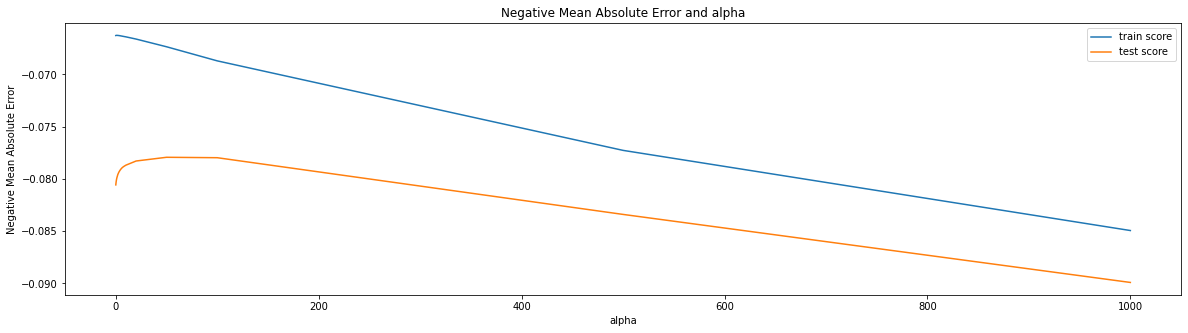

In [57]:
# plotting
plt.figure(figsize=(20,5))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

***Best optimum value for alpha is 50***

In [58]:
alpha = 50
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 3.50316546e-05, -1.15313669e-03,  2.72432394e-02, -4.05729012e-03,
        3.00112968e-03,  6.94165758e-03, -9.98884499e-03,  1.12830396e-03,
        6.18398505e-02,  3.81129532e-02,  3.05194750e-03,  3.04357396e-03,
       -1.75640918e-03, -5.81348206e-03,  2.04909863e-02, -1.25583213e-03,
        1.48258327e-02,  9.63453644e-03,  3.01577137e-02,  5.64546425e-03,
       -9.60778735e-04,  3.29025073e-02,  1.22795643e-02,  4.07501191e-02,
        2.94342404e-02,  4.16295556e-03,  5.67842896e-02,  1.42776093e-02,
        2.77456234e-03,  1.91739623e-02,  1.52543850e-02, -7.04117218e-03,
       -6.26389976e-03,  3.76048843e-03,  1.53661264e-02,  2.28087707e-02,
        5.00706369e-03,  1.06925601e-02,  8.19105559e-03,  2.13299230e-02,
        1.62514500e-02,  1.56481472e-02,  8.63110058e-03,  1.40697903e-02,
        9.94454383e-03,  4.30147674e-03,  1.78943953e-02, -2.88042876e-02,
       -9.16683789e-03,  1.05192548e-02, -2.35431923e-03,  5.41382827e-03,
       -8.35591520e-03,  

In [59]:
#r2 score
y_train_pred = ridge.predict(X_train)
r2_score=metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print('Ridge mean squared error is: {}'.format(mean_squared_error(y_test, ridge.predict(X_test))))
print('Ridge R-Squered: {}'.format(r2_score))

Ridge mean squared error is: 0.017958491758163747
Ridge R-Squered: 0.9352933504933794


In [60]:
ridgefeatures = pd.DataFrame({'Features':X_train.columns, 'Coeff':ridge.coef_.round(4)}).sort_values(by=['Coeff'], ascending=False)

In [61]:
ridgefeatures.head(10)

,Features,Coeff
8,OverallQual,0.0618
26,GrLivArea,0.0568
23,1stFlrSF,0.0408
9,OverallCond,0.0381
21,TotalBsmtSF,0.0329
18,BsmtFinSF1,0.0302
24,2ndFlrSF,0.0294
2,LotArea,0.0272
63,Foundation_PConc,0.0270
35,Functional,0.0228


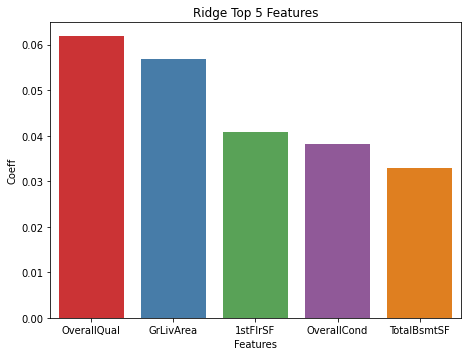

In [62]:
plt.figure(figsize=(25,25))
plt.subplot(4,3,1)
plt.title('Ridge Top 5 Features')
sns.barplot(y = 'Coeff', x='Features', palette='Set1', data = ridgefeatures.head(5))
plt.show()

<h2> Lasso Regression

In [63]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.2s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [64]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.071197,0.008749,0.004601,0.001356,0.0001,{'alpha': 0.0001},-0.081862,-0.080025,-0.084075,-0.078330,-0.071389,-0.079136,0.004319,2,-0.064884,-0.067479,-0.065091,-0.066450,-0.067899,-0.066361,0.001218
1,0.018600,0.001960,0.003600,0.000799,0.001,{'alpha': 0.001},-0.080762,-0.077663,-0.082710,-0.077051,-0.070637,-0.077765,0.004117,1,-0.065988,-0.068648,-0.066717,-0.068284,-0.068848,-0.067697,0.001136
2,0.008397,0.001358,0.003401,0.001020,0.01,{'alpha': 0.01},-0.085936,-0.080426,-0.090871,-0.083679,-0.072623,-0.082707,0.006081,3,-0.076555,-0.079075,-0.076973,-0.077539,-0.079336,-0.077896,0.001117
3,0.007602,0.001358,0.003599,0.000803,0.05,{'alpha': 0.05},-0.114463,-0.107184,-0.121824,-0.108931,-0.099362,-0.110353,0.007501,4,-0.108115,-0.107726,-0.104701,-0.108765,-0.111317,-0.108125,0.002120
4,0.008400,0.001359,0.006399,0.004799,0.1,{'alpha': 0.1},-0.164937,-0.152571,-0.158106,-0.156079,-0.142407,-0.154820,0.007401,5,-0.153874,-0.153440,-0.148766,-0.155368,-0.154600,-0.153210,0.002317
5,0.007802,0.001167,0.004398,0.001200,0.2,{'alpha': 0.2},-0.244679,-0.230910,-0.226095,-0.239264,-0.217497,-0.231689,0.009586,6,-0.231000,-0.230480,-0.230590,-0.231265,-0.229331,-0.230533,0.000664
6,0.006202,0.001470,0.002996,0.001096,0.3,{'alpha': 0.3},-0.306841,-0.297401,-0.298255,-0.306431,-0.287898,-0.299365,0.006963,7,-0.297110,-0.297611,-0.300081,-0.296900,-0.302243,-0.298789,0.002068
7,0.004600,0.000491,0.002799,0.000400,0.4,{'alpha': 0.4},-0.307170,-0.298927,-0.298255,-0.307294,-0.287898,-0.299909,0.007145,8,-0.297460,-0.299141,-0.300081,-0.297712,-0.302243,-0.299328,0.001743
8,0.005400,0.001019,0.002598,0.000489,0.5,{'alpha': 0.5},-0.307170,-0.298927,-0.298255,-0.307294,-0.287898,-0.299909,0.007145,8,-0.297460,-0.299141,-0.300081,-0.297712,-0.302243,-0.299328,0.001743
9,0.004402,0.000491,0.002599,0.000491,0.6,{'alpha': 0.6},-0.307170,-0.298927,-0.298255,-0.307294,-0.287898,-0.299909,0.007145,8,-0.297460,-0.299141,-0.300081,-0.297712,-0.302243,-0.299328,0.001743


In [65]:
#Finding the R-squared value of the lasso model
model_cv_r2 = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv_r2.fit(X_train, y_train) 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.9s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

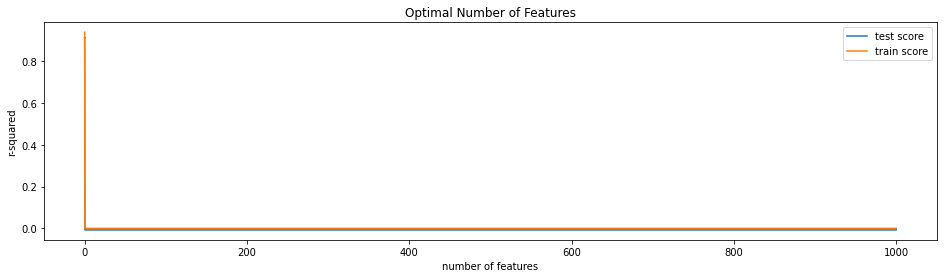

In [66]:
model_cv_r2 = pd.DataFrame(model_cv_r2.cv_results_)
plt.figure(figsize=(16,4))

plt.plot(model_cv_r2["param_alpha"], model_cv_r2["mean_test_score"])
plt.plot(model_cv_r2["param_alpha"], model_cv_r2["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper right')

In [67]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 0.001}
-0.07776455614293495


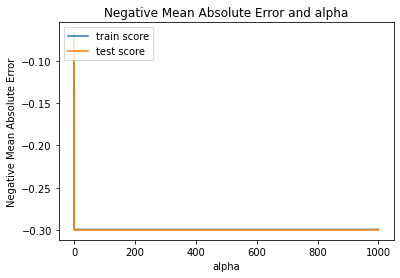

In [68]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

***the bestparam score we got optimum lambda is 0.001***

In [69]:
lasso_alpha = 0.001

lasso = Lasso(alpha=lasso_alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001)

In [70]:
#Predict R Squered value for train data
y_train_pred = lasso.predict(X_train)
print('Lasso Train Data R-Squered: {}'.format(metrics.r2_score(y_true=y_train, y_pred=y_train_pred)))

Lasso Train Data R-Squered: 0.9349529796872046


In [71]:
# Predict R Squered value for the test data
alpha = 0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001)

In [72]:
y_test_pred = lasso.predict(X_test)
print('Lasso Test Data R-Squered: {}'.format(metrics.r2_score(y_true=y_test, y_pred=y_test_pred)))

Lasso Test Data R-Squered: 0.8920088427111437


In [73]:
# Calculating  mean squared error 
print('Lasso mean squared error is: {}'.format(mean_squared_error(y_test, y_test_pred)))

Lasso mean squared error is: 0.017854011236067554


In [74]:
lasso_features = pd.DataFrame({'Features':X_train.columns, 'Coeff':lasso.coef_.round(4)}).sort_values(by=['Coeff'], ascending=False)

In [75]:
lasso_features.head(10)

,Features,Coeff
26,GrLivArea,0.1067
8,OverallQual,0.0730
9,OverallCond,0.0390
18,BsmtFinSF1,0.0351
21,TotalBsmtSF,0.0314
63,Foundation_PConc,0.0286
2,LotArea,0.0280
39,GarageCars,0.0241
35,Functional,0.0239
46,SaleCondition,0.0190


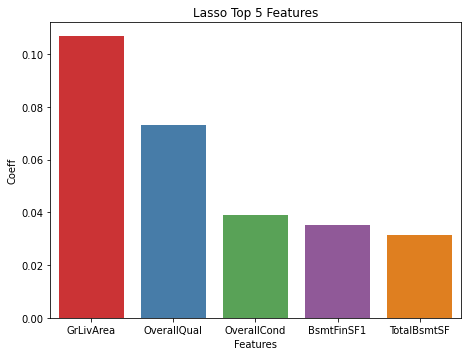

In [76]:
plt.figure(figsize=(25,25))
plt.subplot(4,3,1)
plt.title('Lasso Top 5 Features')
sns.barplot(y = 'Coeff', x='Features', palette='Set1', data = lasso_features.head(5))
plt.show()

<h1>5.Conclusion

- Below are the Optimal lambda values for Ridge and Lasso Models
    - Ridge : 50
    - Lasso : 0.001
- Below are the Mean Squered Error for Ridge and Lasso Models
    - Ridge MSE: 0.017958
    - Lasso MSE: 0.017854
- Below are the R-Squered values for Ridge and Lasso Models
    - Ridge R-Squered: 0.9352
    - Lasso R-Squered: 0.9349
- Significant variables to predict the house proces are OverallQual,GrLivArea,OverallCond,TotalBsmtSF,BsmtFinSF1.
- Both models have different coefficient values for these variables.
- Ridge top 5 pridictors with their Coefficients are
    - OverallQual	0.0618
    - GrLivArea	0.0568
    - 1stFlrSF	0.0408
    - OverallCond	0.0381
    - TotalBsmtSF	0.0329
- Lasso top 5 pridictors with their Coefficients are
    - GrLivArea	0.1067
    - OverallQual	0.0730
    - OverallCond	0.0390
    - BsmtFinSF1	0.0351
    - TotalBsmtSF	0.0314